# Classification Challenge

Wine experts can identify wines from specific vineyards through smell and taste, but the factors that give different wines their individual charateristics are actually based on their chemical composition.

In this challenge, you must train a classification model to analyze the chemical and visual features of wine samples and classify them based on their cultivar (grape variety).

> **Citation**: The data used in this exercise was originally collected by Forina, M. et al.
>
> PARVUS - An Extendible Package for Data Exploration, Classification and Correlation.
Institute of Pharmaceutical and Food Analysis and Technologies, Via Brigata Salerno,
16147 Genoa, Italy.
>
> It can be downloaded from the UCI dataset repository (Dua, D. and Graff, C. (2019). [UCI Machine Learning Repository]([http://archive.ics.uci.edu/ml). Irvine, CA: University of California, School of Information and Computer Science).

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Explore the data

Run the following cell to load a CSV file of wine data, which consists of 12 numeric features and a classification label with the following classes:

- **0** (*variety A*)
- **1** (*variety B*)
- **2** (*variety C*)

In [ ]:
import pandas as pd

# load the training dataset
data = pd.read_csv('/content/drive/MyDrive/Azure DS Certification/Create Machine Learning Models On Azure/Semana3/Challenges/Data/wine.csv')
data.sample(10)

,Alcohol,Malic_acid,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color_intensity,Hue,OD280_315_of_diluted_wines,Proline,WineVariety
50,13.05,1.73,2.04,12.4,92,2.72,3.27,0.17,2.91,7.20,1.12,2.91,1150,0
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,0
164,13.78,2.76,2.30,22.0,90,1.35,0.68,0.41,1.03,9.58,0.70,1.68,615,2
100,12.08,2.08,1.70,17.5,97,2.23,2.17,0.26,1.40,3.30,1.27,2.96,710,1
51,13.83,1.65,2.60,17.2,94,2.45,2.99,0.22,2.29,5.60,1.24,3.37,1265,0
113,11.41,0.74,2.50,21.0,88,2.48,2.01,0.42,1.44,3.08,1.10,2.31,434,1
128,12.37,1.63,2.30,24.5,88,2.22,2.45,0.40,1.90,2.12,0.89,2.78,342,1
29,14.02,1.68,2.21,16.0,96,2.65,2.33,0.26,1.98,4.70,1.04,3.59,1035,0
59,12.37,0.94,1.36,10.6,88,1.98,0.57,0.28,0.42,1.95,1.05,1.82,520,1
149,13.08,3.90,2.36,21.5,113,1.41,1.39,0.34,1.14,9.40,0.57,1.33,550,2


In [ ]:
data.columns

Index(['Alcohol', 'Malic_acid', 'Ash', 'Alcalinity', 'Magnesium', 'Phenols',
       'Flavanoids', 'Nonflavanoids', 'Proanthocyanins', 'Color_intensity',
       'Hue', 'OD280_315_of_diluted_wines', 'Proline', 'WineVariety'],
      dtype='object')

###Datos faltantes

In [ ]:
data.isnull().sum()

Alcohol                       0
Malic_acid                    0
Ash                           0
Alcalinity                    0
Magnesium                     0
Phenols                       0
Flavanoids                    0
Nonflavanoids                 0
Proanthocyanins               0
Color_intensity               0
Hue                           0
OD280_315_of_diluted_wines    0
Proline                       0
WineVariety                   0
dtype: int64

### Descripcion de atributos numericos

In [ ]:
data.describe()

,Alcohol,Malic_acid,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color_intensity,Hue,OD280_315_of_diluted_wines,Proline,WineVariety
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


### Equilibrio de las clases

Parece que no hay problema de una clase que cuente con pocos ejemplos, parece que represetan su poblacion bastante bien

<Axes: >

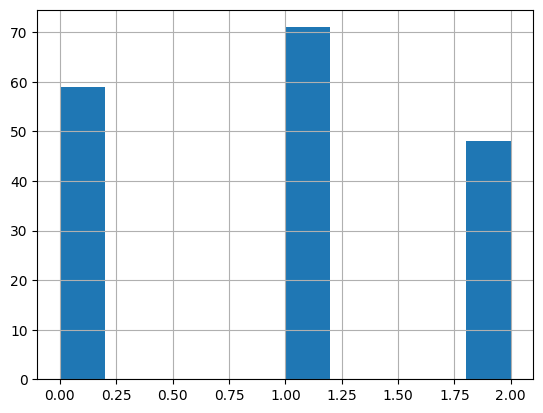

In [ ]:
data['WineVariety'].hist()

### Grafica de los atributos numericos

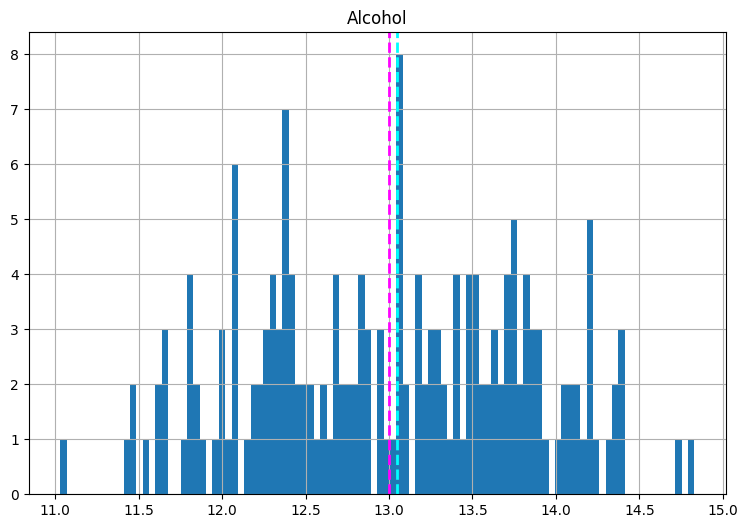

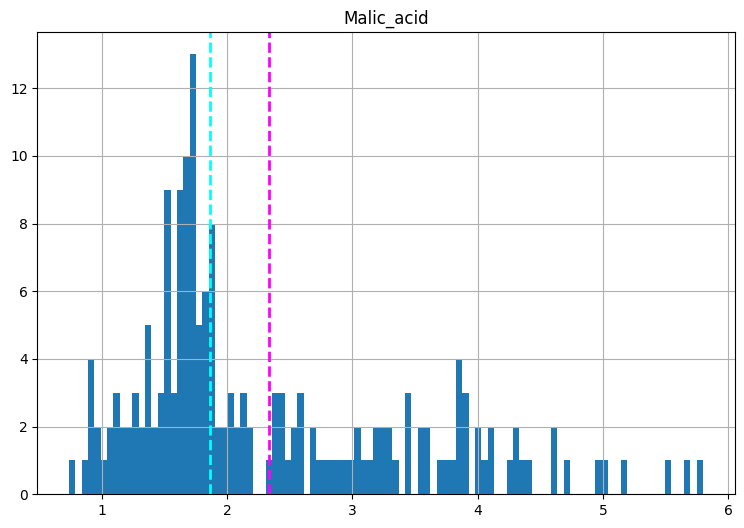

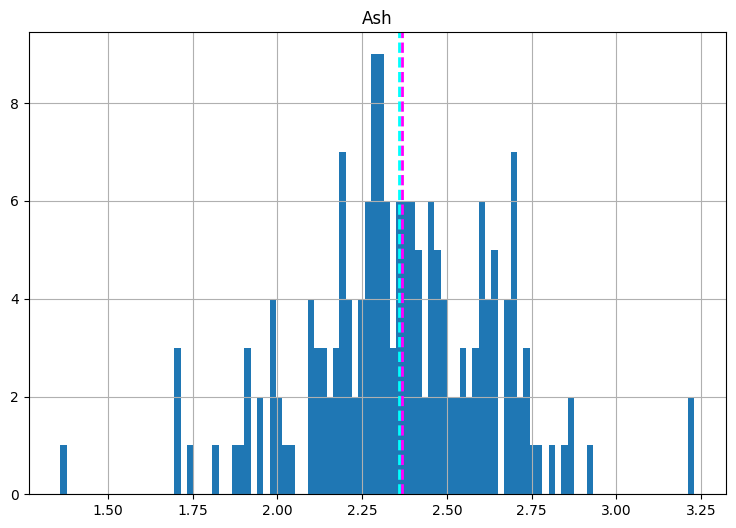

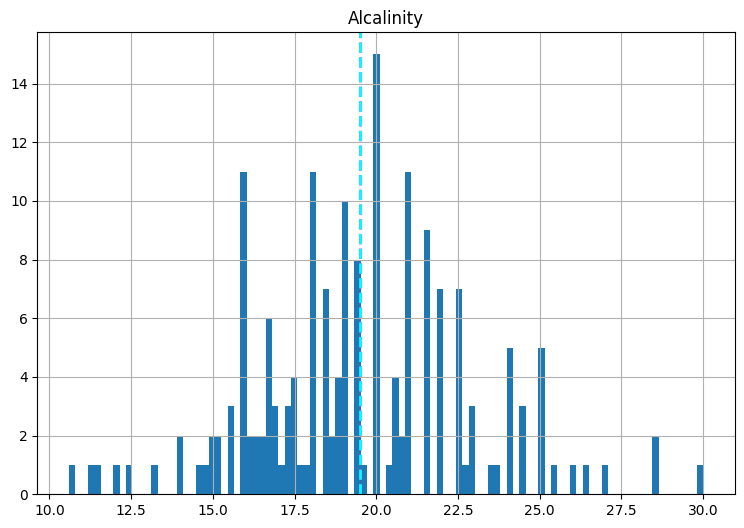

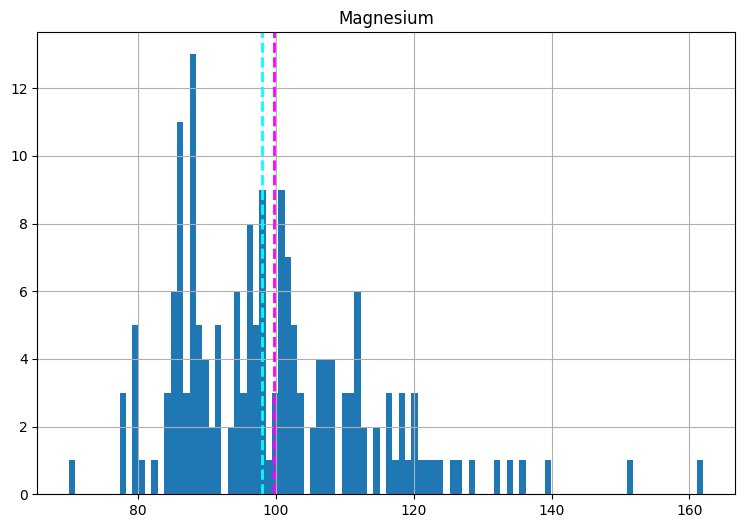

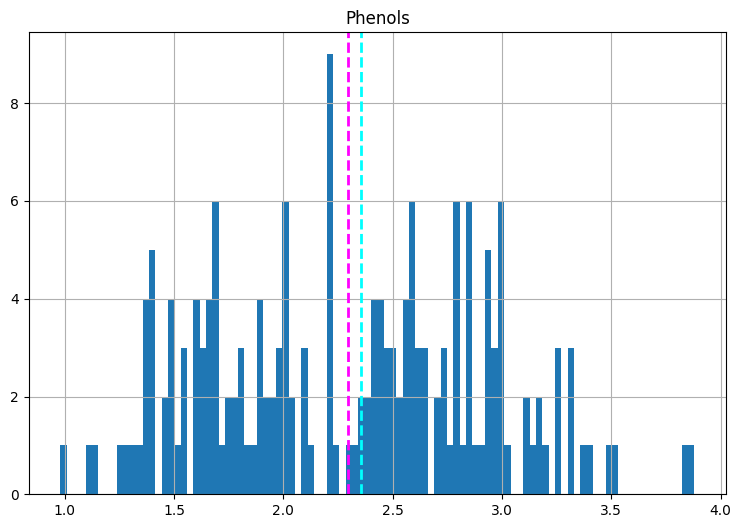

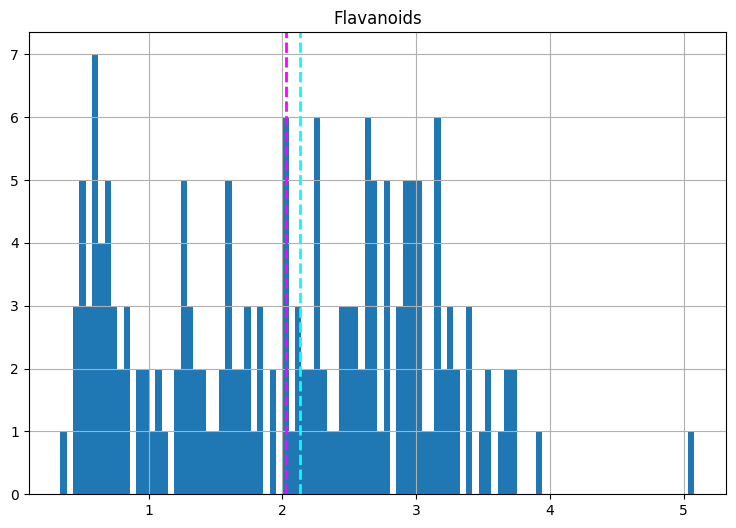

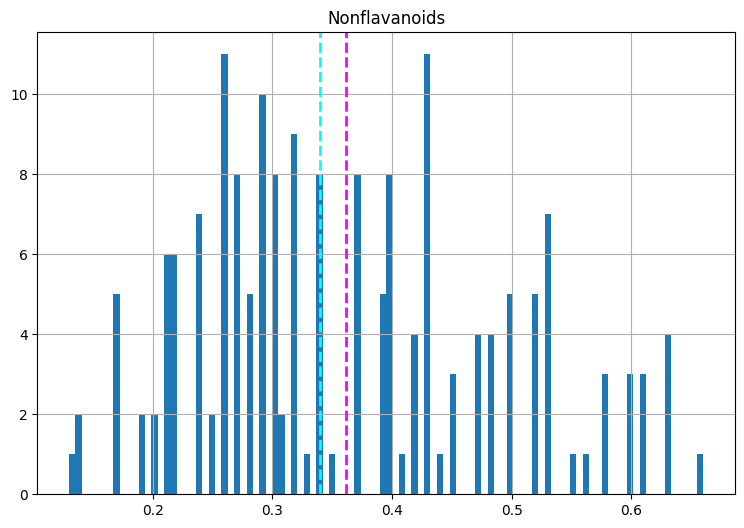

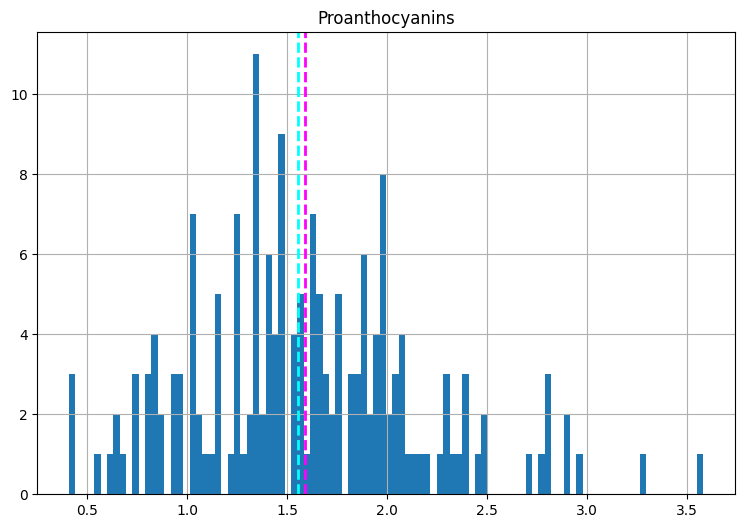

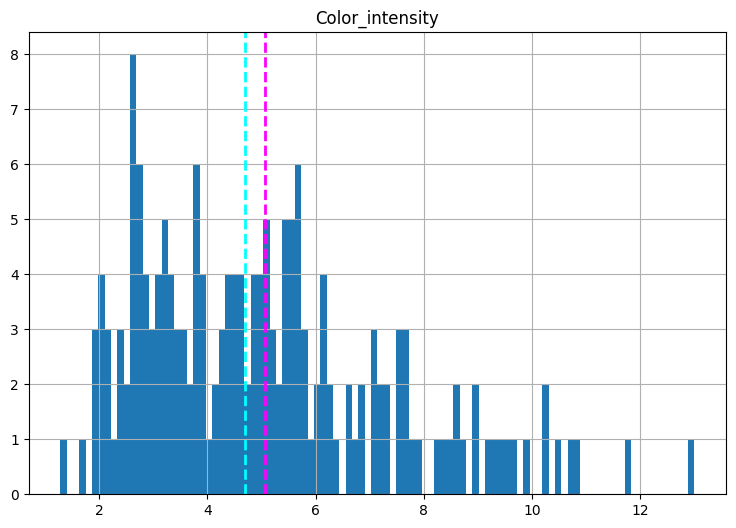

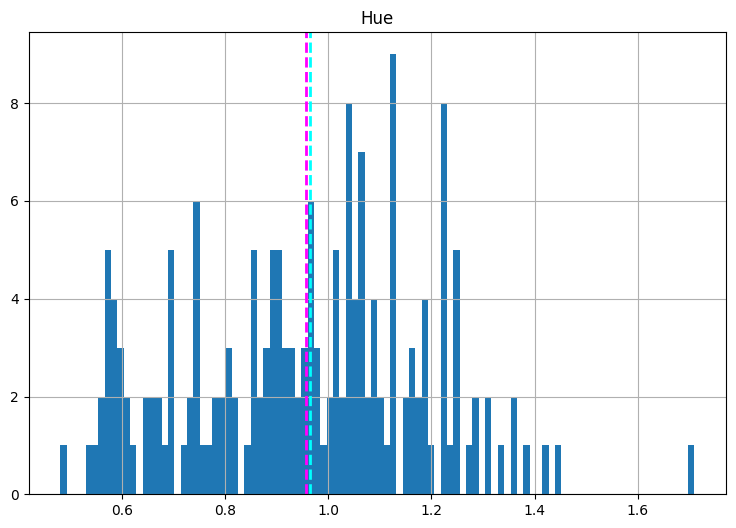

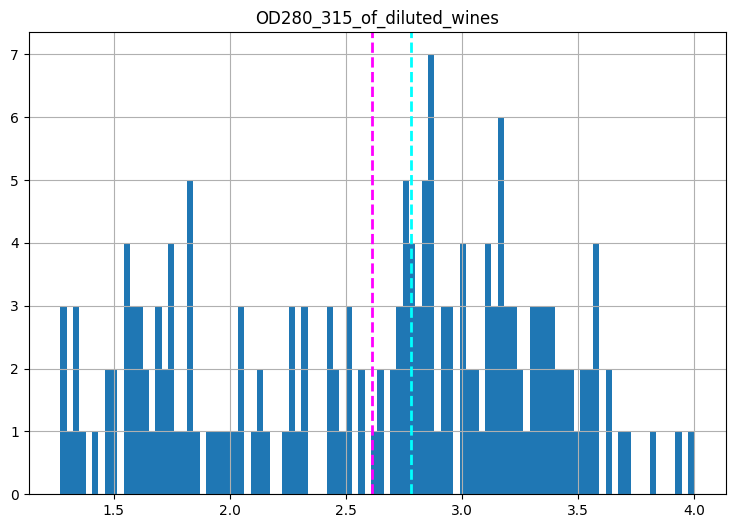

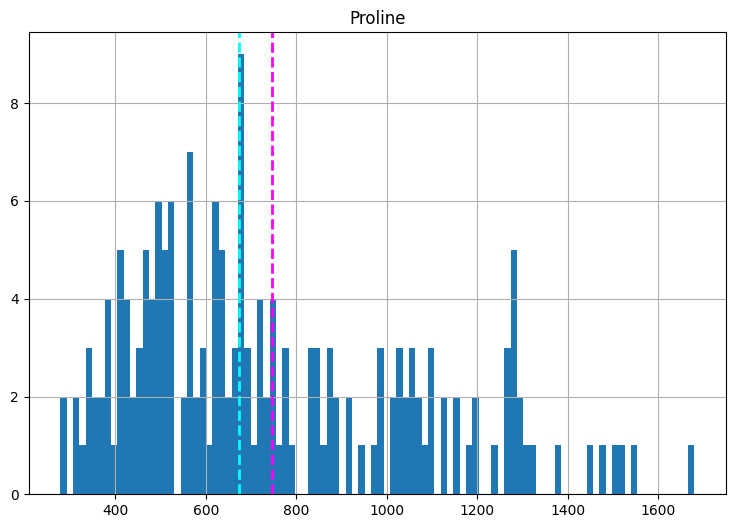

In [ ]:
#from matplotlib import pytplot as plt
import matplotlib.pyplot as plt
numeric_features=['Alcohol', 'Malic_acid', 'Ash', 'Alcalinity', 'Magnesium', 'Phenols',
       'Flavanoids', 'Nonflavanoids', 'Proanthocyanins', 'Color_intensity',
       'Hue', 'OD280_315_of_diluted_wines', 'Proline']

# Plot a histogram for each numeric feature
for col in numeric_features:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = data[col]
    feature.hist(bins=100, ax = ax)
    ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)
    ax.set_title(col)
plt.show()

### Boxplot de los atributos vs clases

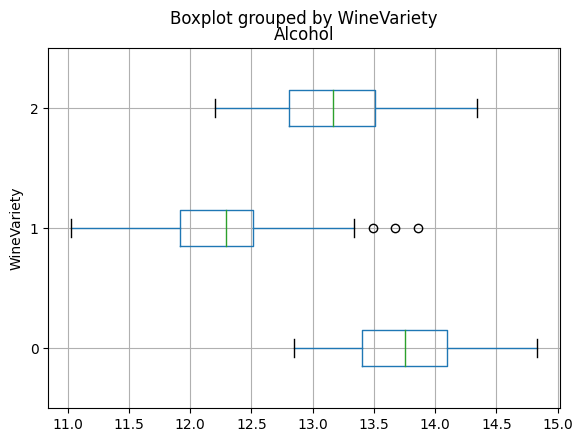

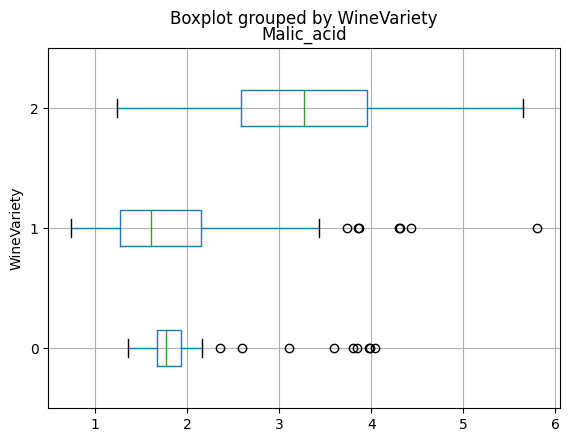

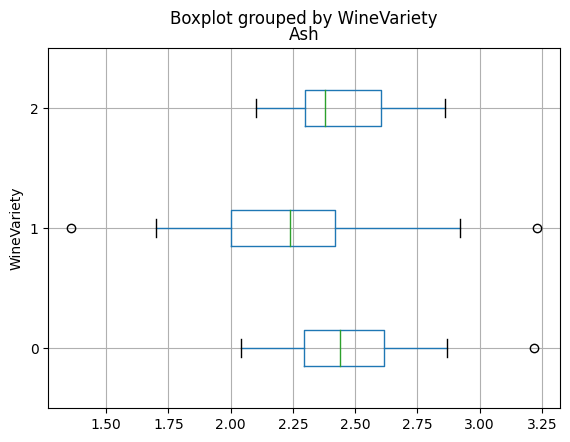

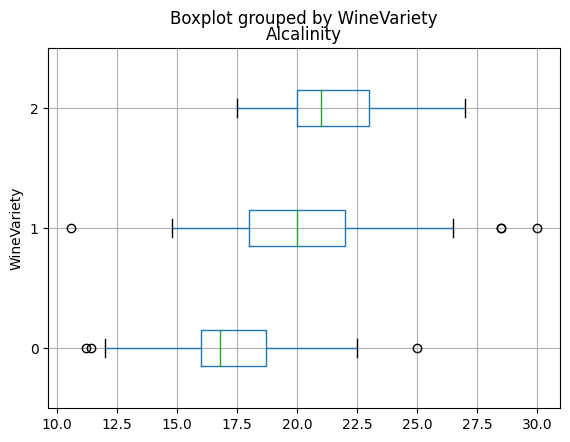

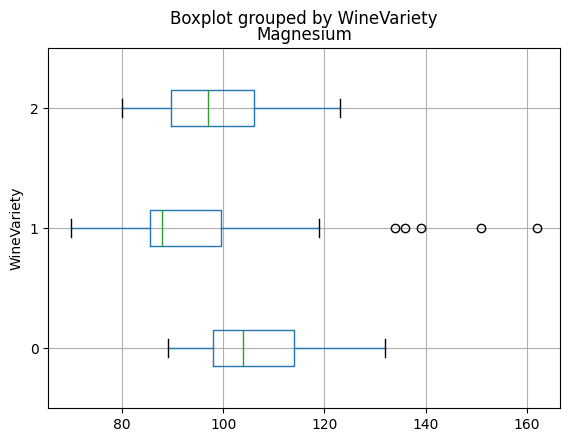

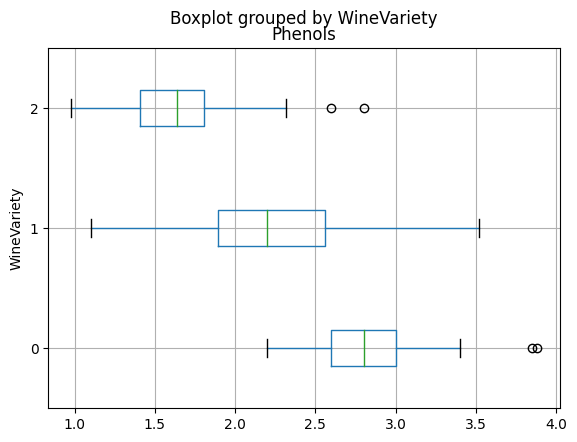

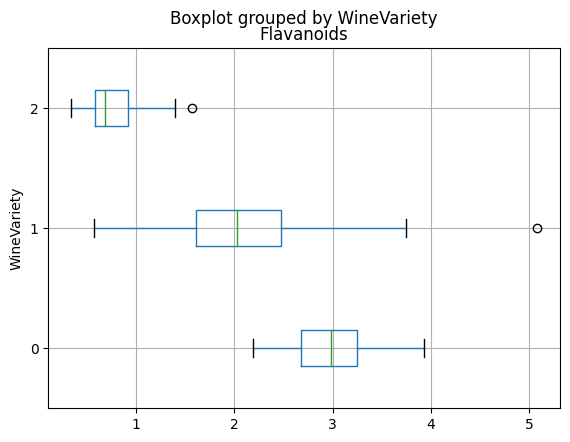

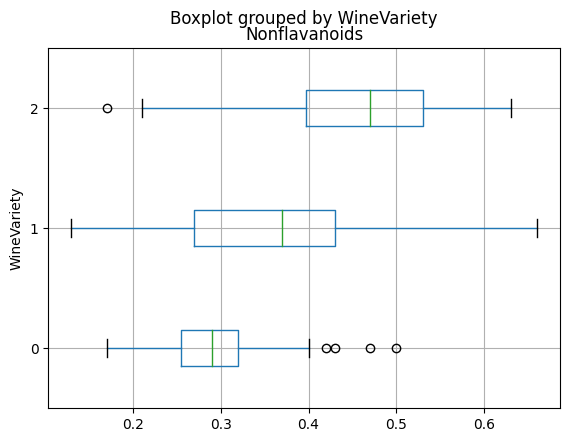

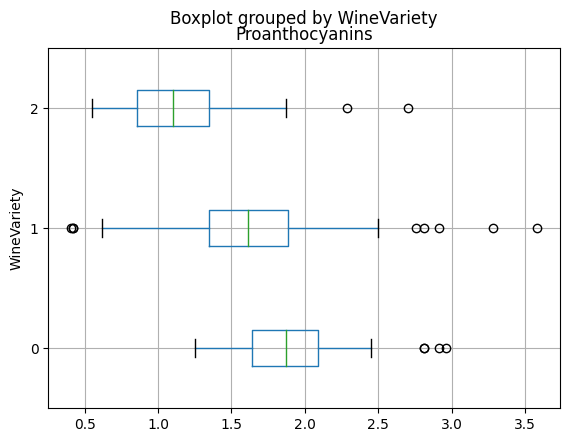

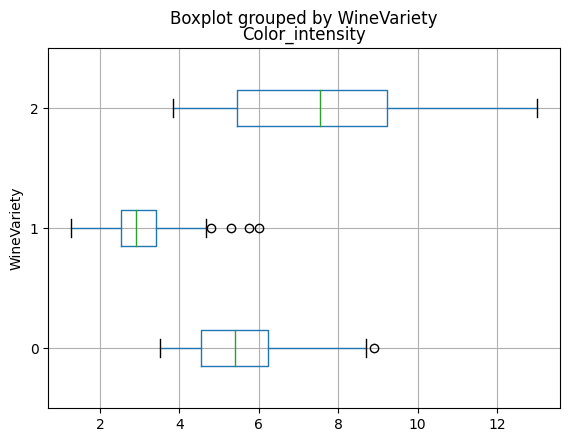

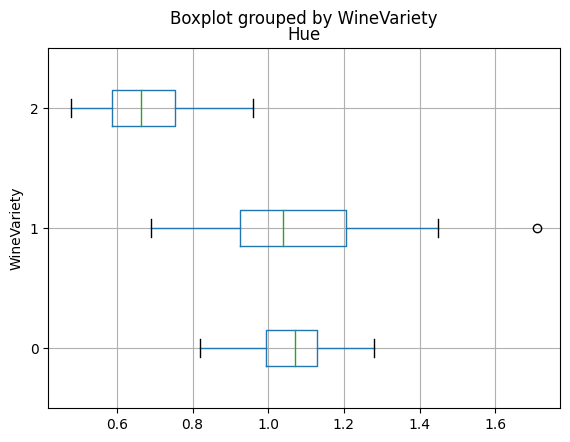

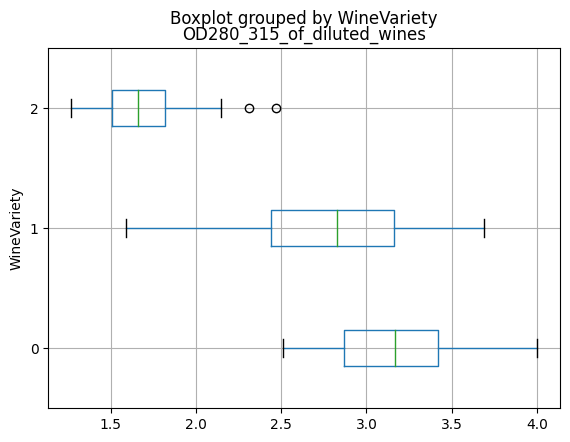

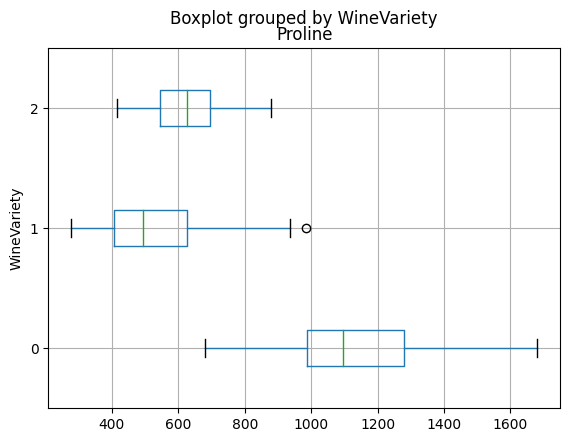

In [ ]:
for feature in numeric_features:
  data.boxplot(column=feature, by= 'WineVariety',vert=False )

**A excepcion del Magnesio, la mayoria de los atributos muestran una diferencia entre las distintas clases de vino consideradas**

## Train and evaluate a model

Add markdown and code cells as required to to explore the data, train a model, and evaluate the model's predictive performance.

Your challenge is to explore the data and train a classification model that achieves an overall *Recall* metric of over 0.95 (95%).

###Baselines

In [ ]:
import numpy as np
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
#from sklearn.metrics import mean_squared_error, r2_score, make_scorer

In [ ]:
X,y=data.iloc[:, :-1].values, data.iloc[:, -1].values
from sklearn.model_selection import train_test_split

# Split data 70%-30% into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

print ('Training Set: %d rows\nTest Set: %d rows' % (X_train.shape[0], X_test.shape[0]))

Training Set: 124 rows
Test Set: 54 rows


In [ ]:
# Train the model
from sklearn.linear_model import LinearRegression

# Set regularization rate
reg = 0.1

# train a logistic regression model on the training set
multi_model = LogisticRegression(C=1/reg, solver='lbfgs', multi_class='auto', max_iter=10000).fit(X_train, y_train)
print (multi_model)

predictions = multi_model.predict(X_test)
print('Predicted labels: ', predictions[:15])
print('Actual labels   : ' ,y_test[:15])

from sklearn. metrics import classification_report

print(classification_report(y_test, predictions))

LogisticRegression(C=10.0, max_iter=10000)
Predicted labels:  [0 2 1 0 1 1 0 2 1 1 2 2 0 1 2]
Actual labels   :  [0 2 1 0 1 1 0 2 1 1 2 2 0 1 2]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      0.95      0.98        22
           2       0.93      1.00      0.96        13

    accuracy                           0.98        54
   macro avg       0.98      0.98      0.98        54
weighted avg       0.98      0.98      0.98        54



In [ ]:
multi_model = RandomForestClassifier(random_state=0).fit(X_train, y_train)
print (multi_model)
predictions = multi_model.predict(X_test)
print('Predicted labels: ', predictions[:15])
print('Actual labels   : ' ,y_test[:15])

from sklearn. metrics import classification_report

print(classification_report(y_test, predictions))

RandomForestClassifier(random_state=0)
Predicted labels:  [0 2 1 0 1 1 0 2 1 1 2 2 0 1 2]
Actual labels   :  [0 2 1 0 1 1 0 2 1 1 2 2 0 1 2]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      0.95      0.98        22
           2       0.93      1.00      0.96        13

    accuracy                           0.98        54
   macro avg       0.98      0.98      0.98        54
weighted avg       0.98      0.98      0.98        54



In [ ]:
import xgboost as xgb
#Si se quiere binaria, basta con cambiar a binary:logistic
multi_model = xgb.XGBClassifier(objective="multi:softprob", random_state=0)
multi_model.fit(X_train , y_train)

#predictions = xgb_model.predict(X_test)
predictions = multi_model.predict(X_test)
print('Predicted labels: ', predictions[:15])
print('Actual labels   : ' ,y_test[:15])

from sklearn. metrics import classification_report

print(classification_report(y_test, predictions))

Predicted labels:  [0 2 1 0 1 0 0 2 1 1 2 2 0 1 2]
Actual labels   :  [0 2 1 0 1 1 0 2 1 1 2 2 0 1 2]
              precision    recall  f1-score   support

           0       0.95      1.00      0.97        19
           1       1.00      0.91      0.95        22
           2       0.93      1.00      0.96        13

    accuracy                           0.96        54
   macro avg       0.96      0.97      0.96        54
weighted avg       0.97      0.96      0.96        54



In [ ]:
# Define preprocessing for numeric columns (scale them)
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


import numpy as np
feature_columns = np.arange(0,13, 1)
feature_transformer = Pipeline(steps=[('scaler', MinMaxScaler())])

# Create preprocessing steps
preprocessor = ColumnTransformer(transformers=[('preprocess', feature_transformer, feature_columns)])
reg=0.1
# Create training pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('regressor', LogisticRegression(C=1/reg, solver='lbfgs', multi_class='auto', max_iter=10000) )])
pipeline.fit(X_train, y_train)

predictions=pipeline.predict(X_test)

print('Predicted labels: ', predictions[:15])
print('Actual labels   : ' ,y_test[:15])

from sklearn. metrics import classification_report

print(classification_report(y_test, predictions))

Predicted labels:  [0 2 1 0 1 1 0 2 1 1 2 2 0 1 2]
Actual labels   :  [0 2 1 0 1 1 0 2 1 1 2 2 0 1 2]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        22
           2       1.00      1.00      1.00        13

    accuracy                           1.00        54
   macro avg       1.00      1.00      1.00        54
weighted avg       1.00      1.00      1.00        54



### Baselines + Escalamiento

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


import numpy as np
feature_columns = np.arange(0,13, 1)
feature_transformer = Pipeline(steps=[('scaler', MinMaxScaler())])

# Create preprocessing steps
preprocessor = ColumnTransformer(transformers=[('preprocess', feature_transformer, feature_columns)])
reg=0.1
# Create training pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('regressor', RandomForestClassifier(random_state=0) )])
pipeline.fit(X_train, y_train)

predictions=pipeline.predict(X_test)

print('Predicted labels: ', predictions[:15])
print('Actual labels   : ' ,y_test[:15])

from sklearn. metrics import classification_report

print(classification_report(y_test, predictions))

Predicted labels:  [0 2 1 0 1 1 0 2 1 1 2 2 0 1 2]
Actual labels   :  [0 2 1 0 1 1 0 2 1 1 2 2 0 1 2]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      0.95      0.98        22
           2       0.93      1.00      0.96        13

    accuracy                           0.98        54
   macro avg       0.98      0.98      0.98        54
weighted avg       0.98      0.98      0.98        54



In [ ]:
import xgboost as xgb
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

import numpy as np
feature_columns = np.arange(0,13, 1)
feature_transformer = Pipeline(steps=[('scaler', MinMaxScaler())])

# Create preprocessing steps
preprocessor = ColumnTransformer(transformers=[('preprocess', feature_transformer, feature_columns)])
reg=0.1
# Create training pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('regressor',  xgb.XGBClassifier(objective="multi:softprob", random_state=0) )])
pipeline.fit(X_train, y_train)

predictions=pipeline.predict(X_test)

print('Predicted labels: ', predictions[:15])
print('Actual labels   : ' ,y_test[:15])

from sklearn. metrics import classification_report

print(classification_report(y_test, predictions))

Predicted labels:  [0 2 1 0 1 0 0 2 1 1 2 2 0 1 2]
Actual labels   :  [0 2 1 0 1 1 0 2 1 1 2 2 0 1 2]
              precision    recall  f1-score   support

           0       0.95      1.00      0.97        19
           1       1.00      0.91      0.95        22
           2       0.93      1.00      0.96        13

    accuracy                           0.96        54
   macro avg       0.96      0.97      0.96        54
weighted avg       0.97      0.96      0.96        54



### Optimizacion de Hiperparametros

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import recall_score

alg = LogisticRegression()
# Try these hyperparameter values
params = {
 'fit_intercept': [True, False],
  'solver': ['lbfgs', 'liblinear']
 }
scorer = make_scorer(recall_score, average='macro')
#score = make_scorer(mean_squared_error)
gridsearch=GridSearchCV(alg, params, cv=[(slice(None), slice(None))], return_train_score=True, error_score='raise')

# Define preprocessing for numeric columns (scale them)
import numpy as np
feature_columns = np.arange(0,13, 1)

numeric_transformer = Pipeline(steps=[('scaler', MinMaxScaler())])
# Combine preprocessing steps
preprocessor = ColumnTransformer(transformers=[('num', numeric_transformer, numeric_features)])
# Create preprocessing and training pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('fitting', gridsearch)])
model = pipeline.fit(X_train, (y_train))

predictions=pipeline.predict(X_test)

print('Predicted labels: ', predictions[:15])
print('Actual labels   : ' ,y_test[:15])

from sklearn. metrics import classification_report

print(classification_report(y_test, predictions))


Predicted labels:  [0 2 1 0 2 1 0 1 1 1 2 2 0 1 2]
Actual labels   :  [0 2 1 0 1 1 0 2 1 1 2 2 0 1 2]
              precision    recall  f1-score   support

           0       0.95      1.00      0.97        19
           1       0.91      0.95      0.93        22
           2       0.91      0.77      0.83        13

    accuracy                           0.93        54
   macro avg       0.92      0.91      0.91        54
weighted avg       0.93      0.93      0.92        54



In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import recall_score

alg = RandomForestClassifier()
# Try these hyperparameter values
params = {
 'max_depth': np.arange(5,50,10),
  'max_features': ['sqrt', 'log2', None]
 }
scorer = make_scorer(recall_score, average='macro')
#score = make_scorer(mean_squared_error)
gridsearch=GridSearchCV(alg, params, cv=[(slice(None), slice(None))], return_train_score=True, error_score='raise')

# Define preprocessing for numeric columns (scale them)
import numpy as np
feature_columns = np.arange(0,13, 1)

numeric_transformer = Pipeline(steps=[('scaler', MinMaxScaler())])
# Combine preprocessing steps
preprocessor = ColumnTransformer(transformers=[('num', numeric_transformer, numeric_features)])
# Create preprocessing and training pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('fitting', gridsearch)])
model = pipeline.fit(X_train, (y_train))

predictions=pipeline.predict(X_test)

print('Predicted labels: ', predictions[:15])
print('Actual labels   : ' ,y_test[:15])

from sklearn. metrics import classification_report

print(classification_report(y_test, predictions))

Predicted labels:  [0 2 1 0 1 1 0 1 1 1 2 2 0 1 2]
Actual labels   :  [0 2 1 0 1 1 0 2 1 1 2 2 0 1 2]
              precision    recall  f1-score   support

           0       0.95      1.00      0.97        19
           1       0.88      1.00      0.94        22
           2       1.00      0.69      0.82        13

    accuracy                           0.93        54
   macro avg       0.94      0.90      0.91        54
weighted avg       0.93      0.93      0.92        54



In [ ]:
import joblib

# Save the model as a pickle file
filename = './model.pkl'
joblib.dump(multi_model, filename)

['./model.pkl']

In [ ]:
# Load the model from the file
multi_model = joblib.load(filename)

x_new = np.array([[13.72,1.43,2.5,16.7,108,3.4,3.67,0.19,2.04,6.8,0.89,2.87,1285], [12.37,0.94,1.36,10.6,88,1.98,0.57,0.28,0.42,1.95,1.05,1.82,520]])
print ('New sample: {}'.format(x_new))

wine_pred = multi_model.predict(x_new)


New sample: [[1.372e+01 1.430e+00 2.500e+00 1.670e+01 1.080e+02 3.400e+00 3.670e+00
  1.900e-01 2.040e+00 6.800e+00 8.900e-01 2.870e+00 1.285e+03]
 [1.237e+01 9.400e-01 1.360e+00 1.060e+01 8.800e+01 1.980e+00 5.700e-01
  2.800e-01 4.200e-01 1.950e+00 1.050e+00 1.820e+00 5.200e+02]]


In [ ]:
wine_pred

array([0, 1])